In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
ds = pd.read_csv('matches.csv')
ds

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [3]:
fig = px.scatter(data_frame=ds, y= 'target_runs', x='result_margin', color='result')
fig.show()

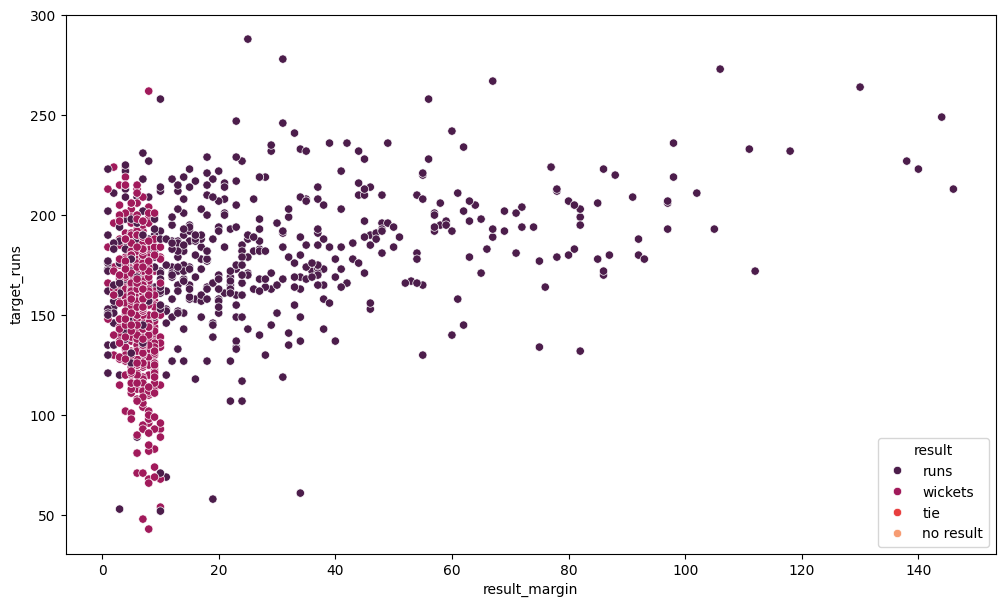

In [4]:
plt.figure(figsize=(12,7))
sns.scatterplot(data = ds, y= 'target_runs', x='result_margin', hue='result', palette='rocket' )
plt.show()

In [5]:
fig = px.histogram(data_frame=ds, x='season', y='target_runs', color='toss_decision')
fig.show()

In [6]:
ds2024 = ds.tail(70)

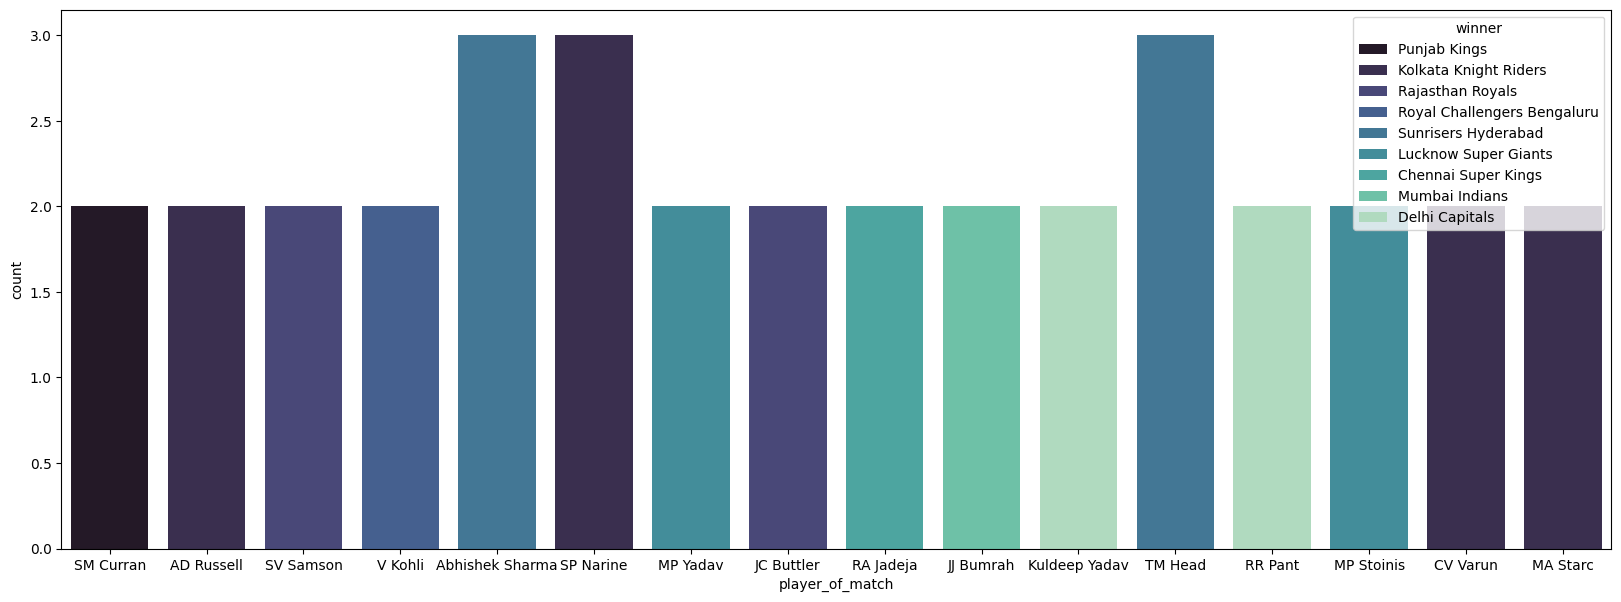

In [7]:
pom_count = ds2024['player_of_match'].value_counts()
mult_pom = pom_count[pom_count > 1].index

# Filter the original DataFrame
filter_pom_ds2024 = ds2024[ds2024['player_of_match'].isin(mult_pom)]

# Plotting
plt.figure(figsize=(20,7))
sns.countplot(data=filter_pom_ds2024, x='player_of_match',hue ='winner', palette='mako')
plt.show()

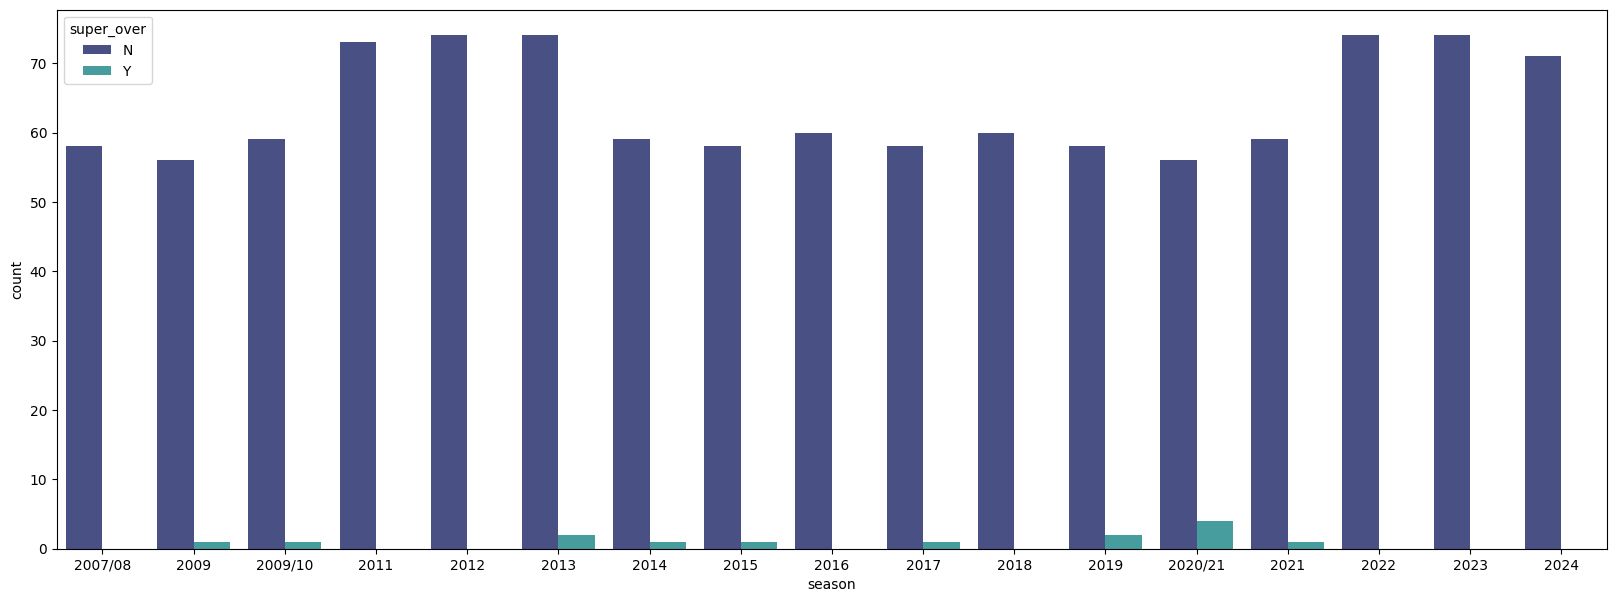

In [8]:
super_over_count = ds['super_over'].value_counts()
mult_s_o = super_over_count[super_over_count > 1].index

# Filter the original DataFrame
filter_s_o_ds = ds[ds['super_over'].isin(mult_s_o)]
plt.figure(figsize=(20,7))
sns.countplot(data=filter_s_o_ds,x='season',hue='super_over',palette='mako')
plt.show()

In [9]:
fig=  px.histogram(data_frame= filter_s_o_ds, x="season", color="super_over")
fig.show()

In [10]:

fig = px.histogram(data_frame=ds,x='season',color='toss_winner')
fig.show()

In [11]:
fig = px.histogram(data_frame=ds,x='winner',color='season')
fig.show()


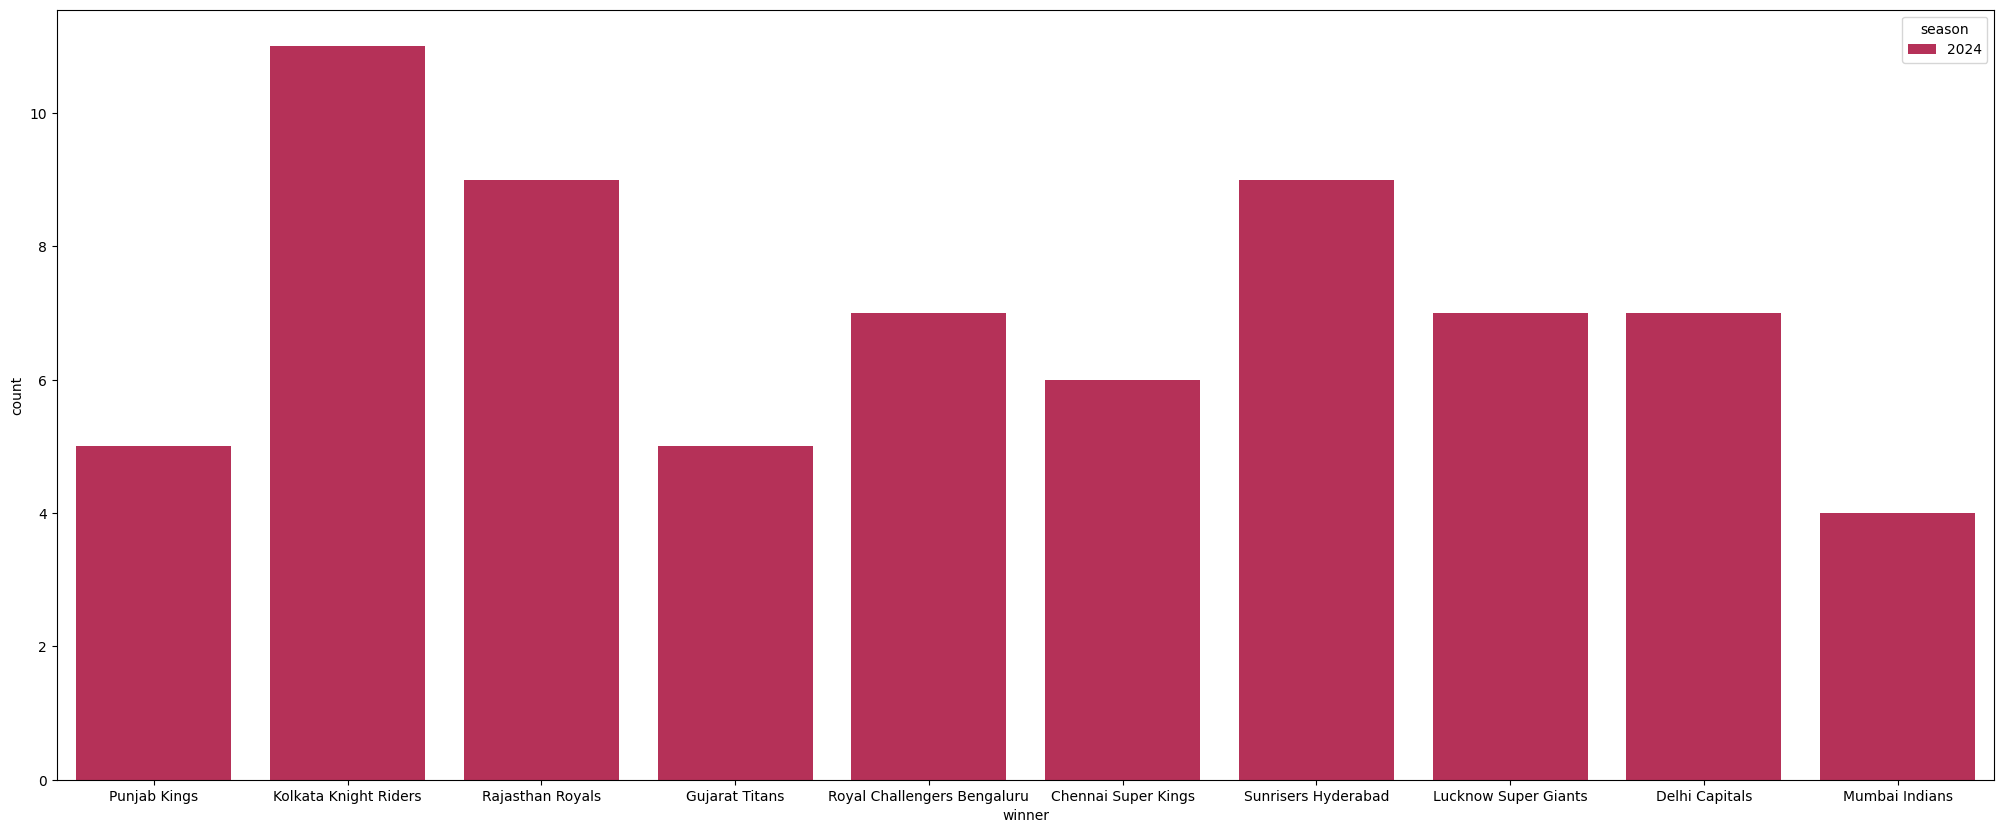

In [12]:
plt.figure(figsize=(25,10))
sns.countplot(data=ds2024,x='winner',hue='season', palette='rocket')
plt.show()

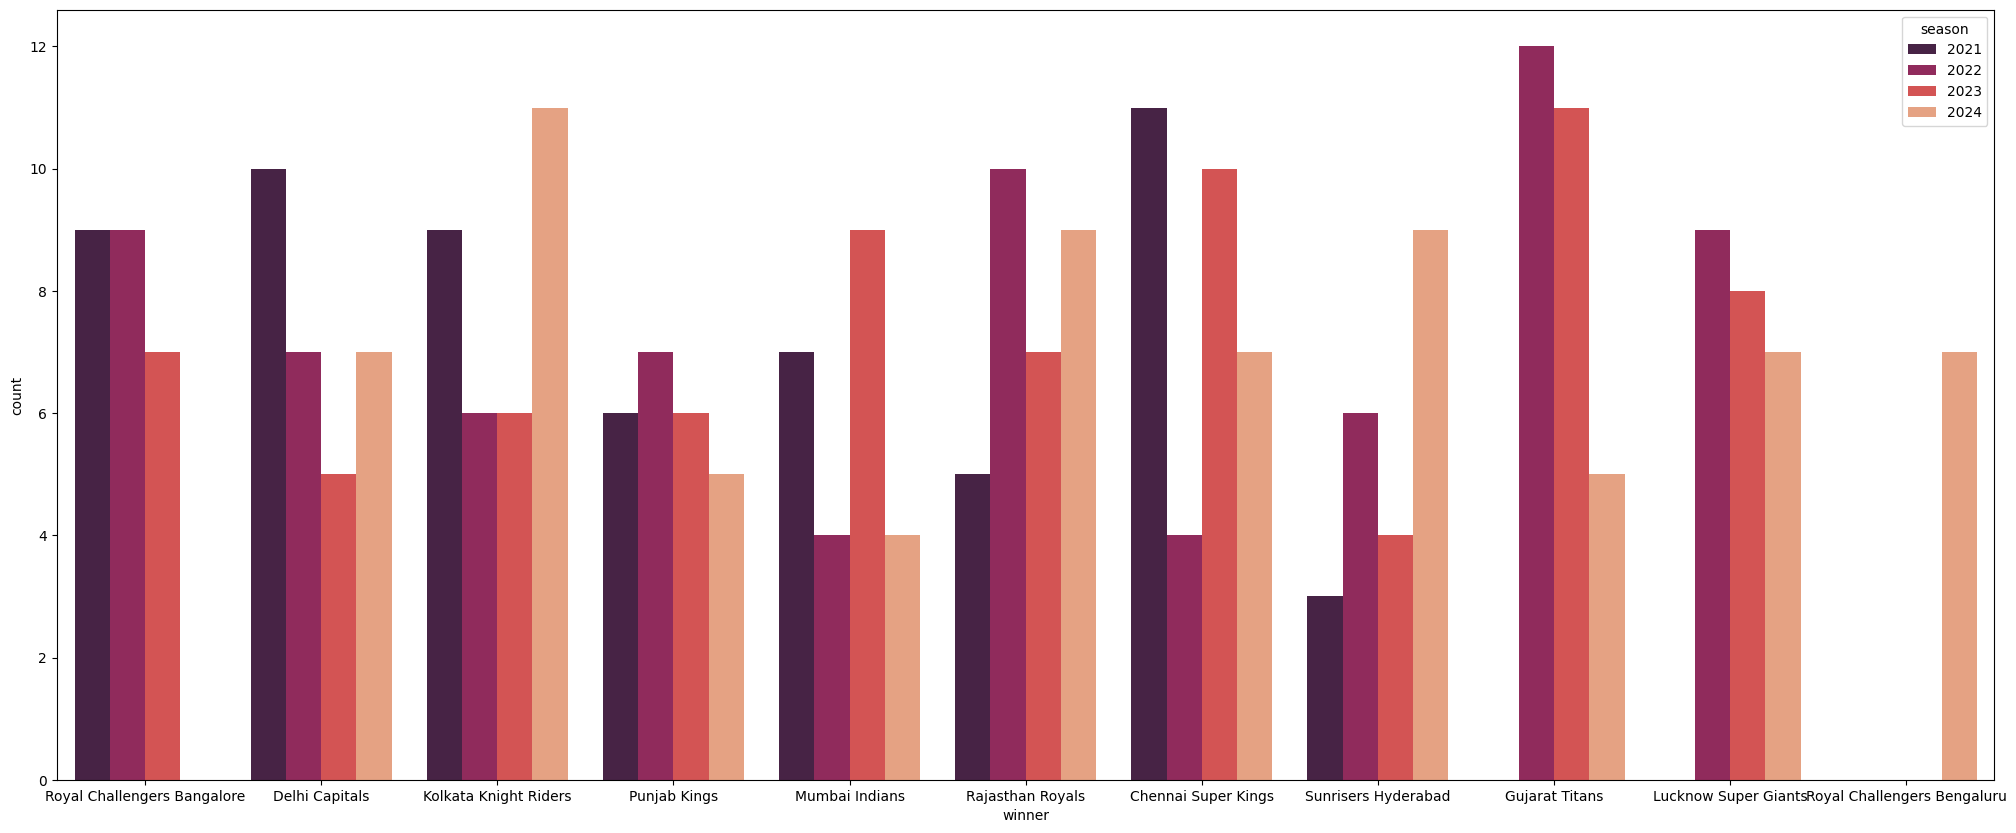

In [13]:
last_4 = ds[ds['season'].isin(['2021','2022','2023','2024'])]
plt.figure(figsize=(25,10))
sns.countplot(data=last_4,x='winner',hue='season', palette='rocket')
plt.show()

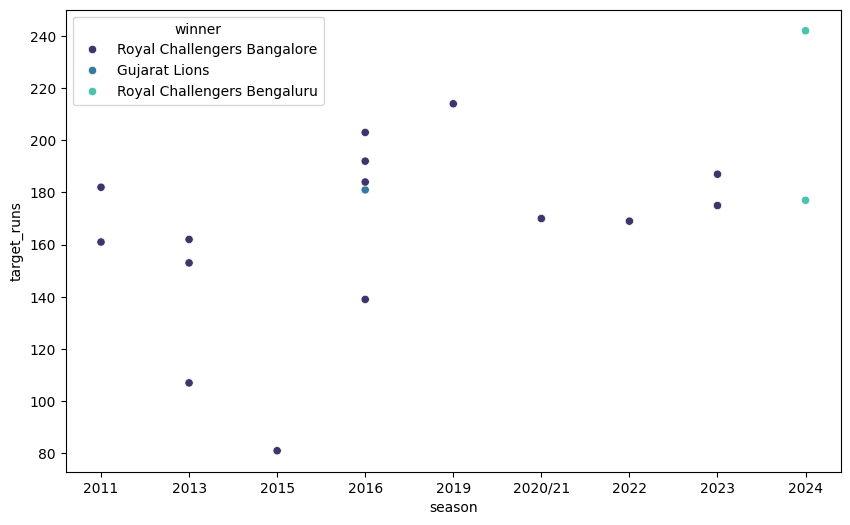

In [14]:
Virat_POM = ds[ds['player_of_match'].isin(['V Kohli'])]
plt.figure(figsize=(10,6))
sns.scatterplot(data=Virat_POM,x='season',y='target_runs',hue='winner',palette='mako')
plt.show()

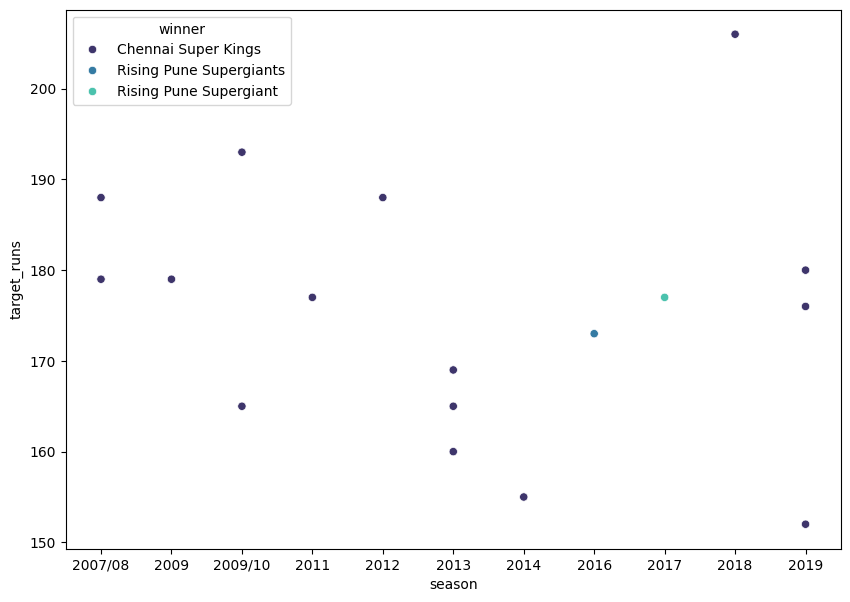

In [15]:
Dhoni_POM = ds[ds['player_of_match'].isin(['MS Dhoni'])]
plt.figure(figsize=(10,7))
sns.scatterplot(data=Dhoni_POM,x='season',y='target_runs',hue='winner',palette='mako')
plt.show()

In [16]:
Virat_POM_chasing = ds[ds['player_of_match'].isin(['V Kohli'])& (ds['toss_winner'] == 'Royal Challengers Bangalore')&(ds['toss_decision'] == 'field')]

fig = px.scatter(data_frame=Virat_POM_chasing,x='season',y='target_runs',color='winner',width=1200, height=700)
fig.show()

In [17]:
Dhoni_POM

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
14,335996,2007/08,Bangalore,2008-04-28,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,179.0,20.0,N,NaN,BR Doctrove,RB Tiffin
27,336009,2007/08,Delhi,2008-05-08,League,MS Dhoni,Feroz Shah Kotla,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,4.0,188.0,20.0,N,NaN,Aleem Dar,RB Tiffin
84,392209,2009,East London,2009-05-04,League,MS Dhoni,Buffalo Park,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,runs,78.0,179.0,20.0,N,NaN,BR Doctrove,M Erasmus
122,419113,2009/10,Kolkata,2010-03-16,League,MS Dhoni,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,55.0,165.0,20.0,N,NaN,HDPK Dharmasena,AM Saheba
168,419159,2009/10,Dharamsala,2010-04-18,League,MS Dhoni,Himachal Pradesh Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,6.0,193.0,20.0,N,NaN,BF Bowden,AM Saheba
229,501253,2011,Chennai,2011-05-12,League,MS Dhoni,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,Chennai Super Kings,runs,18.0,177.0,20.0,N,NaN,AM Saheba,SL Shastri
319,548379,2012,Bangalore,2012-05-23,Elimination Final,MS Dhoni,M Chinnaswamy Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,38.0,188.0,20.0,N,NaN,BF Bowden,HDPK Dharmasena
355,598030,2013,Chennai,2013-04-25,League,MS Dhoni,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Chennai Super Kings,wickets,5.0,160.0,20.0,N,NaN,Aleem Dar,S Das
363,598038,2013,Pune,2013-04-30,League,MS Dhoni,Subrata Roy Sahara Stadium,Pune Warriors,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,37.0,165.0,20.0,N,NaN,S Das,SJA Taufel
385,598062,2013,Chennai,2013-05-14,League,MS Dhoni,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,169.0,20.0,N,NaN,C Shamshuddin,RJ Tucker


In [18]:
Virat_POM

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
203,501227,2011,Delhi,2011-04-26,League,V Kohli,Feroz Shah Kotla,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,3.0,161.0,20.0,N,NaN,S Asnani,RJ Tucker
208,501232,2011,Bangalore,2011-04-29,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,Royal Challengers Bangalore,runs,26.0,182.0,20.0,N,NaN,Aleem Dar,SS Hazare
331,598048,2013,Bangalore,2013-04-09,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Royal Challengers Bangalore,wickets,7.0,162.0,20.0,N,NaN,S Ravi,SJA Taufel
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
391,598068,2013,Bangalore,2013-05-18,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,Royal Challengers Bangalore,runs,24.0,107.0,8.0,N,NaN,C Shamshuddin,RJ Tucker
508,829807,2015,Hyderabad,2015-05-15,League,V Kohli,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,Royal Challengers Bangalore,wickets,6.0,81.0,6.0,N,D/L,AK Chaudhary,HDPK Dharmasena
535,980937,2016,Rajkot,2016-04-24,League,V Kohli,Saurashtra Cricket Association Stadium,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Gujarat Lions,wickets,6.0,181.0,20.0,N,NaN,K Bharatan,BNJ Oxenford
551,980969,2016,Bangalore,2016-05-07,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rising Pune Supergiants,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,192.0,20.0,N,NaN,CB Gaffaney,BNJ Oxenford
564,980995,2016,Kolkata,2016-05-16,League,V Kohli,Eden Gardens,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,9.0,184.0,20.0,N,NaN,CB Gaffaney,A Nand Kishore
566,980999,2016,Bangalore,2016-05-18,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Royal Challengers Bangalore,runs,82.0,203.0,14.0,N,D/L,KN Ananthapadmanabhan,M Erasmus
